# Rain in Australia

Problèmatique : Prévision du temps en Australie (Pluie ou Non Pluie) 

## Importation des bibliothèques

In [4]:
import pandas as pds
import numpy as np

## Chargement dataset

In [5]:
df = pds.read_csv("weatherAUS.csv")

## Montre les informations du dataset

In [6]:
df.shape

(142193, 24)

In [21]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [12]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow             object
dtype: object

## PART 1

Conversion de la colonne Date en datetime

In [11]:
df.Date = pds.to_datetime(df.Date)
df.Date

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
142188   2017-06-20
142189   2017-06-21
142190   2017-06-22
142191   2017-06-23
142192   2017-06-24
Name: Date, Length: 142193, dtype: datetime64[ns]

Conversion de la colonne Location en valeur numerique

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.Location = label_encoder.fit_transform(df.Location)
df.Location

0          2
1          2
2          2
3          2
4          2
          ..
142188    41
142189    41
142190    41
142191    41
142192    41
Name: Location, Length: 142193, dtype: int32

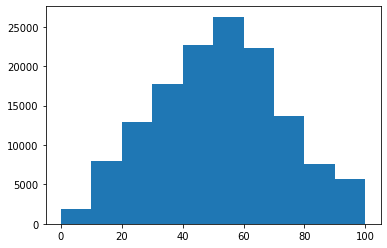

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.hist(df.Humidity3pm)
plt.show()

In [44]:
std = np.std(df.Humidity3pm, ddof=1)
mean = np.mean(df.Humidity3pm)

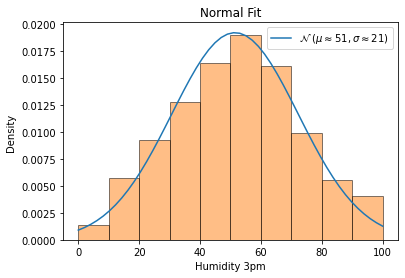

In [46]:
domain = np.linspace(np.min(df.Humidity3pm), np.max(df.Humidity3pm))
plt.plot(domain, norm.pdf(domain, mean, std),
label='$\mathcal{N}$ '+f'$(\mu \\approx {round(mean)}, \sigma \\approx {round(std)} )$')
plt.hist(df.Humidity3pm, edgecolor='black', alpha=.5, density=True)
plt.title("Normal Fit")
plt.xlabel("Humidity 3pm")
plt.ylabel("Density ")
plt.legend()
plt.show()

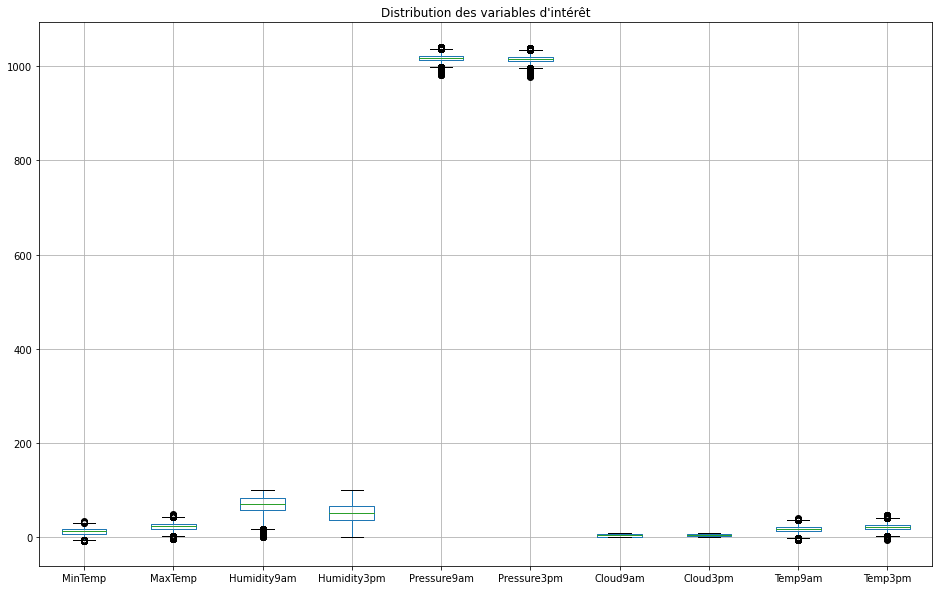

In [65]:
plt.figure(figsize=(16,10))
df[["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]].boxplot()
plt.title("Distribution des variables d'intérêt")
plt.show()

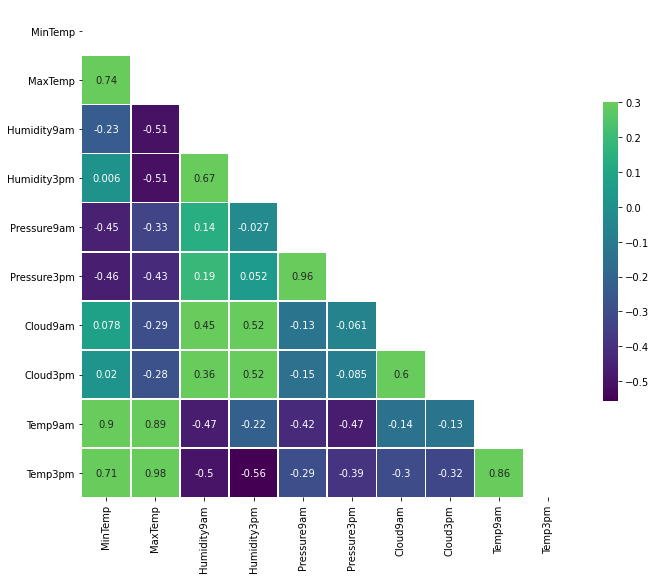

In [68]:
import seaborn as sea

data_corr=pds.DataFrame(df,columns=["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"])

corr=data_corr.corr()
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Dans cette matrice de corrélation, on peut voir qu'il y a une corrélation forte entre la températeur de 15h et la température de 9h